## Challenge data ENS Valeo

In [44]:
# Noureddine Khelifaoui

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import numpy as np


from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import io


df_Xtrain = pd.read_csv('https://www.lamsade.dauphine.fr/~airiau/Teaching/M1-ML/traininginputs.csv')
#X=df.loc[:,].values

df_yTrain = pd.read_csv('https://www.lamsade.dauphine.fr/~airiau/Teaching/M1-ML/trainingoutput.csv')
#=df.loc[:].values

df_Xtest = pd.read_csv('https://www.lamsade.dauphine.fr/~airiau/Teaching/M1-ML/testinputs.csv')
#_val = df.loc[:,]

# avoir une idée sur les données

In [26]:
df_Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34515 entries, 0 to 34514
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PROC_TRACEINFO                   34515 non-null  object 
 1   OP070_V_1_angle_value            34515 non-null  float64
 2   OP090_SnapRingPeakForce_value    34515 non-null  float64
 3   OP070_V_2_angle_value            34515 non-null  float64
 4   OP120_Rodage_I_mesure_value      34515 non-null  float64
 5   OP090_SnapRingFinalStroke_value  34515 non-null  float64
 6   OP110_Vissage_M8_torque_value    34515 non-null  float64
 7   OP100_Capuchon_insertion_mesure  15888 non-null  float64
 8   OP120_Rodage_U_mesure_value      34515 non-null  float64
 9   OP070_V_1_torque_value           34515 non-null  float64
 10  OP090_StartLinePeakForce_value   34515 non-null  float64
 11  OP110_Vissage_M8_angle_value     34515 non-null  float64
 12  OP090_SnapRingMidP

on remarque que pour l'attribut "OP100_Capuchon_insertion_mesure" , la moitié des valeurs sont manquantes

In [27]:
df_Xtrain.describe()

,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value
count,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,15888.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000
mean,159.906922,156.915055,159.618236,113.350222,11.970190,12.256785,0.388173,11.971027,6.548403,23.630152,17.878398,97.700978,6.550867
std,15.662650,11.271492,15.091490,3.528522,0.169873,0.065319,0.024425,0.003050,0.097602,2.546341,6.785079,6.837714,0.094814
min,101.800000,0.000000,82.000000,99.990000,0.000000,12.030000,0.240000,11.970000,5.670000,0.000000,6.300000,0.000000,5.740000
25%,148.700000,149.210000,149.400000,111.040000,11.850000,12.210000,0.380000,11.970000,6.410000,22.280000,13.500000,94.310000,6.420000
50%,158.000000,156.180000,158.700000,113.160000,12.040000,12.260000,0.390000,11.970000,6.610000,23.880000,16.400000,98.500000,6.610000
75%,169.300000,164.380000,168.900000,115.380000,12.080000,12.300000,0.410000,11.970000,6.620000,25.290000,20.200000,102.230000,6.610000
max,198.300000,196.920000,198.100000,177.950000,12.190000,12.500000,0.420000,11.990000,6.670000,43.410000,84.600000,127.300000,6.670000


## visualiser la distribution des différents attributs

In [45]:
df_Xtrain.drop("PROC_TRACEINFO",axis=1,inplace=True)
PROC_TRACEINFO_Xtest = df_Xtest["PROC_TRACEINFO"]
df_Xtest.drop("PROC_TRACEINFO",axis=1,inplace=True)
y_train = df_yTrain["Binar OP130_Resultat_Global_v"].to_numpy()

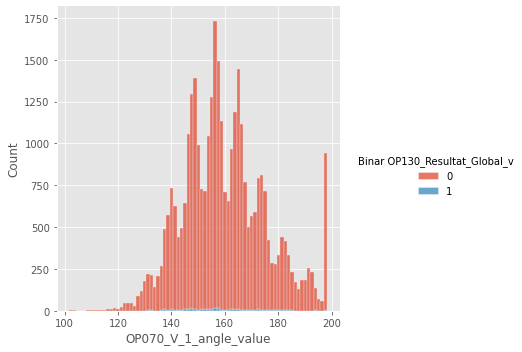

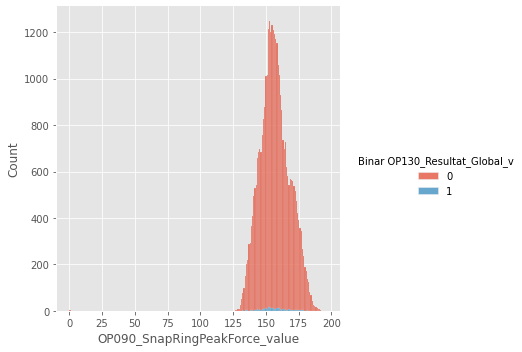

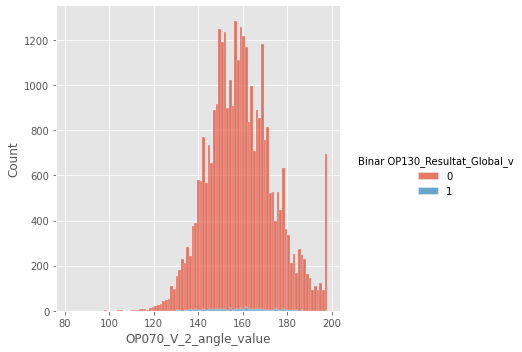

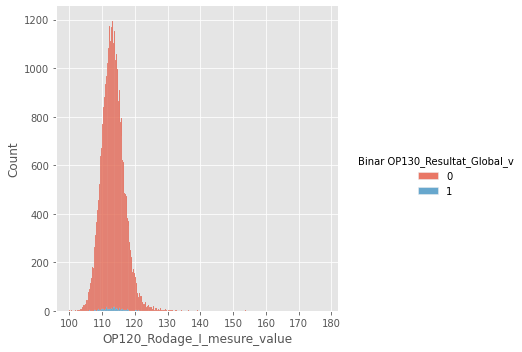

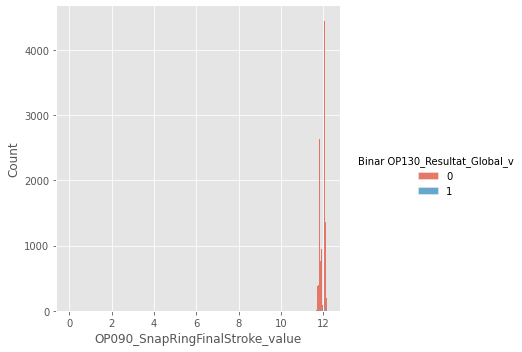

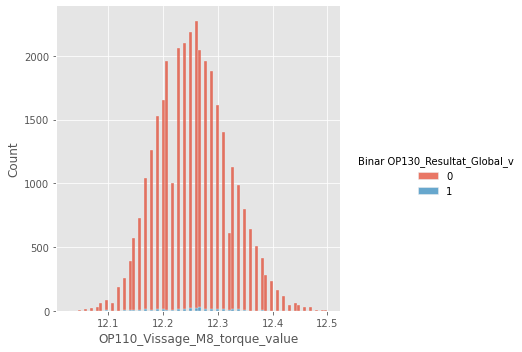

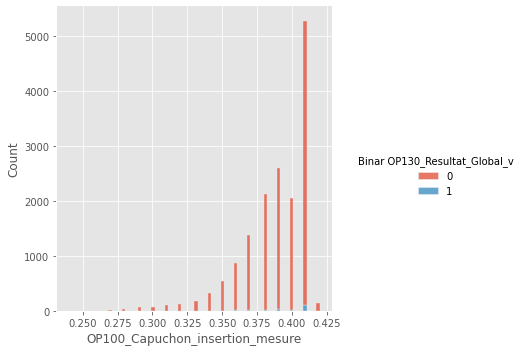

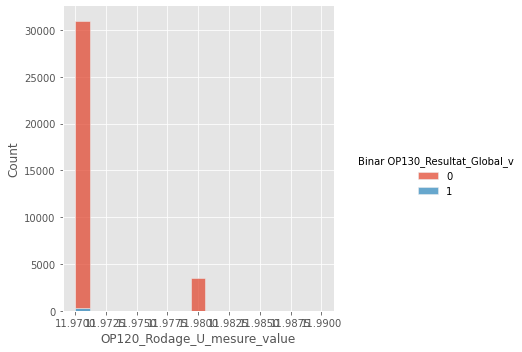

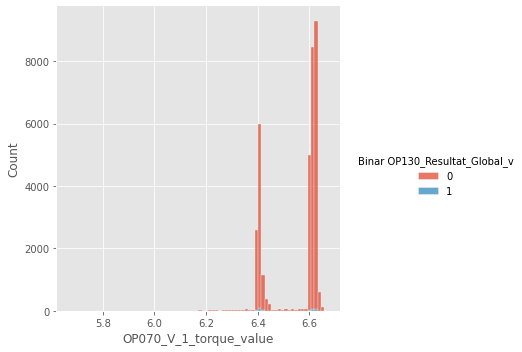

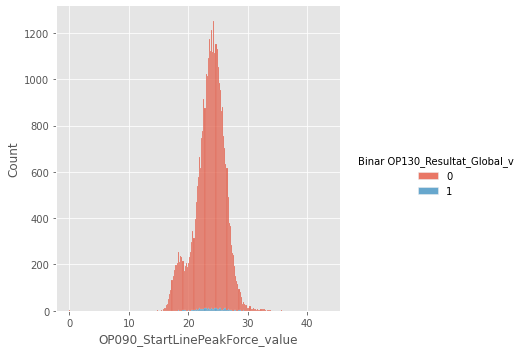

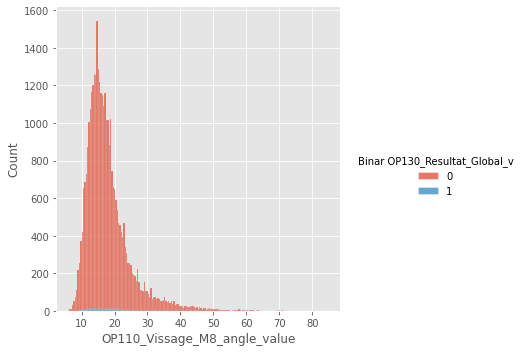

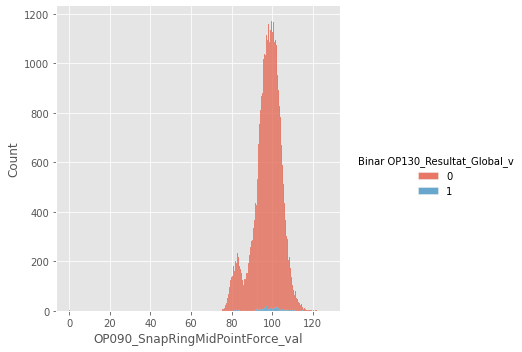

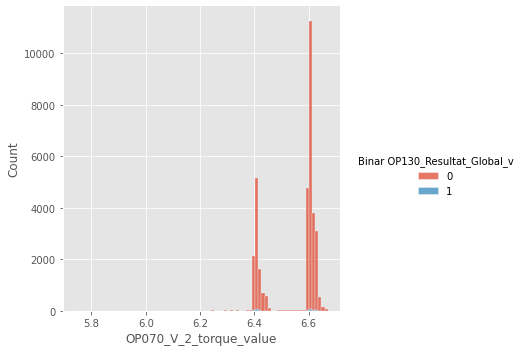

In [30]:
for feature in df_Xtrain.columns:
    sns.displot(df_Xtrain, x=feature, hue=df_yTrain.loc[:,"Binar OP130_Resultat_Global_v"], multiple="stack")

0    34210
1      305
Name: Binar OP130_Resultat_Global_v, dtype: int64


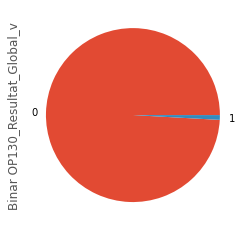

In [46]:
print(df_yTrain["Binar OP130_Resultat_Global_v"].value_counts())
df_yTrain["Binar OP130_Resultat_Global_v"].value_counts().plot(kind='pie')

## corriger le problème des valeurs manquantes

In [47]:
def benchmarkTechnique(xtrain):
  rf = RandomForestClassifier()
  scores_rf  = cross_val_score(rf, xtrain, y_train, cv=5, scoring='roc_auc')
  print("random forest : ",scores_rf)
  print("scores_rf mean :",scores_rf.mean())


1. supprimer l'attribut: "OP100_Capuchon_insertion_mesure" 

In [48]:
df_Xtrain1 = df_Xtrain.copy()
df_Xtrain1.drop("OP100_Capuchon_insertion_mesure",axis=1,inplace=True)


tester les donnés avec l'algorithme RandomForest 

In [ ]:
benchmarkTechnique(df_Xtrain1.to_numpy())

random forest :  [0.59269531 0.57122953 0.56997882 0.55141101 0.54825667]
scores_rf mean : 0.5667142672308452


2. utilser la moyenne pour remplacer les valeurs manquantes : 

In [49]:
df_Xtrain2 = df_Xtrain.copy()

In [50]:
from sklearn.impute import SimpleImputer

df_Xtrain2 = df_Xtrain
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp = imp.fit(df_Xtrain2[['OP100_Capuchon_insertion_mesure']])
df_Xtrain2['OP100_Capuchon_insertion_mesure'] = imp.transform(df_Xtrain2[['OP100_Capuchon_insertion_mesure']])



In [ ]:
benchmarkTechnique(df_Xtrain2.to_numpy())

random forest :  [0.58637346 0.59751607 0.51901467 0.60211878 0.52445958]
scores_rf mean : 0.5658965119009397


3. utilser un estimateur qui est une fonction des autres attributs

In [51]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df_Xtrain3 = df_Xtrain.copy()

itImp = IterativeImputer()
itImp.fit_transform(df_Xtrain3[['OP100_Capuchon_insertion_mesure']])


array([[0.39],
       [0.39],
       [0.39],
       ...,
       [0.39],
       [0.39],
       [0.39]])

In [ ]:
benchmarkTechnique(df_Xtrain3.to_numpy())

random forest :  [0.56488851 0.56718508 0.54666093 0.55378784 0.5568056 ]
scores_rf mean : 0.5578655938969048


on remarque que la moyenne des auroc pour Random Forest  avec des données imputé avec la méthode 3 est similaire à celles obtenue  avec les deux première méthodes , donc on a choisi de supprimer l'attribut puisque l'imputaion n'apoorte pas plus d'information pour l'algorithme et la variance est réduite avec ces méthode d'imputation ce qui ne favorise pas l'apprentissage. 

In [52]:
X_train = df_Xtrain1.to_numpy()
df_Xtest.drop("OP100_Capuchon_insertion_mesure",axis=1,inplace=True)
X_test = df_Xtest.to_numpy()

## 1. Random Forest : 

pour cet algorithme , on n'a pas besoin de normaliser ou standardiser les données.l'objectif est de trouver les meilleur hyperparamère qui donne un bon score auroc

In [56]:
rf = RandomForestClassifier(class_weight='balanced')
randomForest_parameters_grid = dict(criterion=["gini","entropy"],min_samples_split=[2,5,8])

In [57]:
randomForest_grid = GridSearchCV(rf,randomForest_parameters_grid, cv=5, scoring='roc_auc',n_jobs=-1)

In [58]:
randomForest_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [62]:
print(randomForest_grid.best_score_)
print(randomForest_grid.best_params_)

0.5912658555402743
{'criterion': 'entropy', 'min_samples_split': 8}


### sur-échantillonnage 

In [65]:
oversamling = SMOTE(sampling_strategy=0.3)
X_oversampled30, y_oversampled30 = oversamling.fit_resample(X_train, y_train)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [66]:
rf30 = RandomForestClassifier(class_weight='balanced')
randomForest_parameters_grid = dict(criterion=["gini","entropy"],min_samples_split=[2,5,8])
randomForest_grid = GridSearchCV(rf30,randomForest_parameters_grid, cv=5, scoring='roc_auc',n_jobs=-1)
randomForest_grid.fit(X_oversampled30,y_oversampled30)



GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [67]:
print(randomForest_grid.best_score_)
print(randomForest_grid.best_params_)


0.999238397403593
{'criterion': 'gini', 'min_samples_split': 2}


In [ ]:
y_rf10_predictions = randomForest_grid.predict(X_test)

In [12]:
def create_SubmissionCSVFile(name,y_predictions):
    df = pd.DataFrame(data={'PROC_TRACEINFO':PROC_TRACEINFO_Xtest , 'Binar OP130_Resultat_Global_v': y_predictions})
    df.to_csv(name,index=False)

In [ ]:
create_SubmissionCSVFile("randomForest_oversampling10.csv",y_rf10_predictions)

## Naive Bayes

In [68]:
Nb = GaussianNB()
Nb_cv = cross_val_score(Nb, X_train, y_train, cv = 5,scoring='roc_auc')
print(Nb_cv.mean())

0.6368183974583215


In [69]:
Nb_cv_oversampling = cross_val_score(Nb, X_oversampled30, y_oversampled30, cv = 5,scoring='roc_auc')
print(Nb_cv_oversampling.mean())

0.7287935518254491


In [70]:
Nb.fit(X_oversampled30,y_oversampled30)

GaussianNB(priors=None, var_smoothing=1e-09)

In [71]:
y_Nb_oversampled30 =  Nb.predict(X_test)

In [ ]:
create_SubmissionCSVFile('naiveBayes_oversampling30.csv',y_Nb_oversampled30)

pour les prochains algorithmes qu'on va utilser (Knn, classification logistique, réseaux de neuronnes)  il faut normaliser les données car ces algorithmes sont sensibles au différentes échelles 

In [72]:
X_train_normalised = preprocessing.normalize(X_train)
X_oversampled30_normalised = preprocessing.normalize(X_oversampled30)
X_test_normalised = preprocessing.normalize(X_test)

##Knn

puisque on sait que Knn est trés sensible au données déséquilibré , on utilise les données obtenues par le sur-échantillonnage

In [ ]:
knn = KNeighborsClassifier()
knn_grid_parameters = dict(n_neighbors=[i for i in range(3,16,2)],weights=["uniform","distance"],metric=["euclidean","manhattan","chebyshev"])
knn_grid = GridSearchCV(knn,knn_grid_parameters, cv=5, scoring='roc_auc',n_jobs=-1)
knn_grid.fit(X_oversampled30_normalised,y_oversampled30)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [ ]:
print(knn_grid.best_score_)
print(knn_grid.best_params_)
print(knn_grid.)

0.9877278067542201
{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
y_knn_oversamling30 = knn_grid.predict(X_test_normalised)

In [ ]:
create_SubmissionCSVFile("knn_oversamling30.csv",y_knn_oversamling30)

## classification avec regression logistique(preceptron)



### sans le sur-échantillonnage 

In [73]:
lg = LogisticRegression(class_weight='balanced')

cv_lg= cross_val_score(lg, X_train_normalised, y_train, cv = 5,scoring='roc_auc')

In [74]:
print(cv_lg)
print(cv_lg.mean())

[0.51564829 0.57584303 0.57859843 0.55359376 0.56040799]
0.5568183016182595


### avec le sur-échantillonnage

In [76]:

def testDifferentOversamplingRatiosForLogistic():
  mean_scores=[]
  ratios = [0.1,0.2,0.3,0.4]
  lg = LogisticRegression()
  for r in ratios:
    oversamling = SMOTE(sampling_strategy=r)
    X_oversampled, y_oversampled = oversamling.fit_resample(X_train, y_train)
    X_oversampled = preprocessing.normalize(X_oversampled)
    mean_scores.append((cross_val_score(lg, X_oversampled, y_oversampled, cv = 5,scoring='roc_auc')).mean())
  return dict(zip(ratios,mean_scores))


In [77]:
logisticRegression_results  = testDifferentOversamplingRatiosForLogistic()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [78]:
print(logisticRegression_results)

{0.1: 0.5709781977181082, 0.2: 0.5828432749895315, 0.3: 0.5792970707770937, 0.4: 0.5827910158455938}


le meilleur score est obtenue avec r = 0.2

In [186]:
def createLogistic_grid():

  lg = LogisticRegression()
  lg_grid_parameters = dict(class_weight=['balanced',{0:1,1:95},{0:1,1:90},{0:1,1:85},{0:1,1:80},{0:1,1:75},{0:1,1:70},{0:1,1:65},{0:1,1:60},{0:1,1:50},{0:2,1:90}])
  lg_grid = GridSearchCV(lg,lg_grid_parameters, cv=2, scoring='roc_auc',n_jobs=-1)
  lg_grid.fit(X_train_normalised,y_train)
 
  return lg_grid


In [187]:
logisticModel_grid = createLogistic_grid()
logisticModel_grid.best_params_

{'class_weight': {0: 1, 1: 65}}

In [188]:
logisticModel_grid.best_score_

0.5686562548423318

In [185]:

y_lg= logisticModel_grid.predict(X_test_normalised)


In [168]:
create_SubmissionCSVFile("logistic_regression_classifier.csv",y_lg)

## réseaux de neurones


In [114]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

def create_Model():
  model = Sequential()
  model.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dense(6, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])
  return model

X_trainNN,X_valid,y_trainNN,y_valid =train_test_split(X_train_normalised, y_train, stratify = y_train, test_size = 0.2)




In [115]:
model = create_Model()

model.fit(X_trainNN,y_trainNN,class_weight={0:1, 1:100},epochs=10)

Epoch 1/10
863/863 [==============================] - 2s 1ms/step - loss: 1.3554 - auc: 0.4821
Epoch 2/10
863/863 [==============================] - 1s 1ms/step - loss: 1.2155 - auc: 0.4530
Epoch 3/10
863/863 [==============================] - 1s 1ms/step - loss: 1.2670 - auc: 0.4735
Epoch 4/10
863/863 [==============================] - 1s 1ms/step - loss: 1.3342 - auc: 0.4743
Epoch 5/10
863/863 [==============================] - 1s 1ms/step - loss: 1.3316 - auc: 0.4641
Epoch 6/10
863/863 [==============================] - 1s 1ms/step - loss: 1.3204 - auc: 0.4788
Epoch 7/10
863/863 [==============================] - 1s 1ms/step - loss: 1.2246 - auc: 0.4848
Epoch 8/10
863/863 [==============================] - 1s 1ms/step - loss: 1.2427 - auc: 0.4989
Epoch 9/10
863/863 [==============================] - 1s 1ms/step - loss: 1.2698 - auc: 0.4825
Epoch 10/10
863/863 [==============================] - 1s 1ms/step - loss: 1.2509 - auc: 0.4616


In [116]:
model.evaluate(X_valid,y_valid)
print(score)

216/216 [==============================] - 1s 1ms/step - loss: 0.6436 - auc: 0.5001
0.5359172612743852


### avec le sur-échantillonnage

In [144]:
def neuralnetwork_oversampling(ratio):

  print(ratio)
  oversamling = SMOTE(sampling_strategy=ratio)
  X_oversampled, y_oversampled = oversamling.fit_resample(X_train, y_train)

  X_oversampled = preprocessing.normalize(X_oversampled)

  X_trainNN,X_valid,y_trainNN,y_valid =train_test_split(X_oversampled, y_oversampled, stratify = y_oversampled, test_size = 0.2)

  model = create_Model()
  model.fit(X_trainNN,y_trainNN,epochs=30)
  

  _,score = model.evaluate(X_valid,y_valid)

  return score

In [145]:
oversamling_scores=[]
ratios = [0.1,0.2,0.3]

for r in ratios :
  oversamling_scores.append(neuralnetwork_oversampling(r))

d = dict(zip(ratios,oversamling_scores))

0.1
Epoch 1/30


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


941/941 [==============================] - 2s 1ms/step - loss: 0.3917 - auc: 0.4984
Epoch 2/30
941/941 [==============================] - 1s 1ms/step - loss: 0.3056 - auc: 0.4549
Epoch 3/30
941/941 [==============================] - 1s 1ms/step - loss: 0.3094 - auc: 0.4730
Epoch 4/30
941/941 [==============================] - 1s 1ms/step - loss: 0.3034 - auc: 0.4688
Epoch 5/30
941/941 [==============================] - 1s 1ms/step - loss: 0.3047 - auc: 0.4774
Epoch 6/30
941/941 [==============================] - 1s 1ms/step - loss: 0.3097 - auc: 0.4750
Epoch 7/30
941/941 [==============================] - 1s 1ms/step - loss: 0.3035 - auc: 0.4683
Epoch 8/30
941/941 [==============================] - 1s 1ms/step - loss: 0.3038 - auc: 0.4642
Epoch 9/30
941/941 [==============================] - 1s 1ms/step - loss: 0.3130 - auc: 0.4781
Epoch 10/30
941/941 [==============================] - 1s 1ms/step - loss: 0.3032 - auc: 0.4721
Epoch 11/30
941/941 [==============================] - 1s 1m

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1027/1027 [==============================] - 2s 1ms/step - loss: 0.4526 - auc: 0.5011
Epoch 2/30
1027/1027 [==============================] - 1s 1ms/step - loss: 0.4518 - auc: 0.5034
Epoch 3/30
1027/1027 [==============================] - 1s 1ms/step - loss: 0.4498 - auc: 0.5157
Epoch 4/30
1027/1027 [==============================] - 1s 1ms/step - loss: 0.4502 - auc: 0.5163
Epoch 5/30
1027/1027 [==============================] - 1s 1ms/step - loss: 0.4522 - auc: 0.5165
Epoch 6/30
1027/1027 [==============================] - 1s 1ms/step - loss: 0.4493 - auc: 0.5154
Epoch 7/30
1027/1027 [==============================] - 1s 1ms/step - loss: 0.4480 - auc: 0.5155
Epoch 8/30
1027/1027 [==============================] - 1s 1ms/step - loss: 0.4497 - auc: 0.5234
Epoch 9/30
1027/1027 [==============================] - 1s 1ms/step - loss: 0.4468 - auc: 0.5279
Epoch 10/30
1027/1027 [==============================] - 1s 1ms/step - loss: 0.4515 - auc: 0.5337
Epoch 11/30
1027/1027 [=================

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1112/1112 [==============================] - 2s 1ms/step - loss: 0.5559 - auc: 0.5115
Epoch 2/30
1112/1112 [==============================] - 1s 1ms/step - loss: 0.5374 - auc: 0.5254
Epoch 3/30
1112/1112 [==============================] - 1s 1ms/step - loss: 0.5398 - auc: 0.5258
Epoch 4/30
1112/1112 [==============================] - 1s 1ms/step - loss: 0.5362 - auc: 0.5432
Epoch 5/30
1112/1112 [==============================] - 1s 1ms/step - loss: 0.5422 - auc: 0.5446
Epoch 6/30
1112/1112 [==============================] - 1s 1ms/step - loss: 0.5395 - auc: 0.5475
Epoch 7/30
1112/1112 [==============================] - 1s 1ms/step - loss: 0.5359 - auc: 0.5466
Epoch 8/30
1112/1112 [==============================] - 1s 1ms/step - loss: 0.5357 - auc: 0.5599
Epoch 9/30
1112/1112 [==============================] - 1s 1ms/step - loss: 0.5407 - auc: 0.5628
Epoch 10/30
1112/1112 [==============================] - 1s 1ms/step - loss: 0.5372 - auc: 0.5651
Epoch 11/30
1112/1112 [=================

In [146]:
print(d)

{0.1: 0.5609431266784668, 0.2: 0.5731745362281799, 0.3: 0.6008938550949097}


le meilleur score est obtenue avec un ratio de sur-échantillonnage = 0.3


In [148]:
oversamling = SMOTE(sampling_strategy=0.3)
X_oversampled, y_oversampled = oversamling.fit_resample(X_train, y_train)

X_oversampled = preprocessing.normalize(X_oversampled)

X_trainNN,X_valid,y_trainNN,y_valid =train_test_split(X_oversampled, y_oversampled, stratify = y_oversampled, test_size = 0.2)

model = create_Model()
model.fit(X_trainNN,y_trainNN,epochs=50)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/50
1112/1112 [==============================] - 2s 1ms/step - loss: 0.6132 - auc: 0.4996
Epoch 2/50
1112/1112 [==============================] - 1s 1ms/step - loss: 0.5395 - auc: 0.4910
Epoch 3/50
1112/1112 [==============================] - 1s 1ms/step - loss: 0.5400 - auc: 0.4974
Epoch 4/50
1112/1112 [==============================] - 1s 1ms/step - loss: 0.5417 - auc: 0.4959
Epoch 5/50
1112/1112 [==============================] - 1s 1ms/step - loss: 0.5378 - auc: 0.4979
Epoch 6/50
1112/1112 [==============================] - 1s 1ms/step - loss: 0.5403 - auc: 0.5087
Epoch 7/50
1112/1112 [==============================] - 1s 1ms/step - loss: 0.5343 - auc: 0.5114
Epoch 8/50
1112/1112 [==============================] - 1s 1ms/step - loss: 0.5407 - auc: 0.5218
Epoch 9/50
1112/1112 [==============================] - 1s 1ms/step - loss: 0.5406 - auc: 0.5225
Epoch 10/50
1112/1112 [==============================] - 1s 1ms/step - loss: 0.5375 - auc: 0.5257
Epoch 11/50
1112/1112 [======

In [180]:
y_nn = model.predict(X_test_normalised)
  

In [181]:
y_nn[y_nn<0.3]=0 
y_nn[y_nn>0.3]=1
y_nn = y_nn.flatten().astype('int32')

In [183]:
create_SubmissionCSVFile("neural_network_oversampling30.csv",y_nn)